# Colombian Constitution EDA.
    Brief resume about the methodology and the results that we got.

## About the Document
    The Political Constitution of the Republic of Colombia of 1991 is the Magna Carta of the Republic of Colombia. It was promulgated in the Constitutional Gazette number 114 of Thursday, July 4, 1991, and is also known as the Constitution of Human Rights. It replaced the Political Constitution of 1886 and was issued during the presidency of the liberal César Gaviria.1

## DS Pipeline



## Document Data Model

PowerPoint graph, meanwhile we can use the hierarchy of the articles dictionary

```
hierarchy = {
    'TITULO' : 'h1',
    'DISPOSICIONES' : 'h1',
    'CAPITULO' : 'h2',
    'ARTÍCULO' : 'p'

}
```

## EDA

### Libraries 

In [1]:

import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
from os import path
root_folder = "LegalSearcher/ReadFiles"
constitution_f = f'{root_folder}/es_col_constitution.json'



In [2]:
filepath = path.abspath(path.join('','..', '..', constitution_f))
#import Dataset
df = pd.read_json(filepath)

In [3]:
print("Shape of data=>",df.shape)
df.head(5)

Shape of data=> (439, 5)


index             id  \
0  constitucion_politica_de_colombia  const01000001   
1  constitucion_politica_de_colombia  const01000002   
2  constitucion_politica_de_colombia  const01000003   
3  constitucion_politica_de_colombia  const01000004   
4  constitucion_politica_de_colombia  const01000005   

                                            headline  \
0  {'title': 'TITULO I', 'name': 'DE LOS PRINCIPI...   
1  {'title': 'TITULO I', 'name': 'DE LOS PRINCIPI...   
2  {'title': 'TITULO I', 'name': 'DE LOS PRINCIPI...   
3  {'title': 'TITULO I', 'name': 'DE LOS PRINCIPI...   
4  {'title': 'TITULO I', 'name': 'DE LOS PRINCIPI...   

                         chapter  \
0  {'title': None, 'name': None}   
1  {'title': None, 'name': None}   
2  {'title': None, 'name': None}   
3  {'title': None, 'name': None}   
4  {'title': None, 'name': None}   

                                             article  
0  {'name': 'Artículo 1', 'content': ['Artículo 1...  
1  {'name': 'Artículo 2', 'content': ['Artículo 2...  
2  {'name': 'Artículo 3', 'content': ['Artículo 3...  
3  {'name': 'Artículo 4', 'content': ['Artículo 4...  
4  {'name': 'Artículo 5', 'content': ['Artículo 5...

### Dataset Cleaning

In [4]:
#Json format extraction
h1=df['headline'].apply(pd.Series)
h1.rename(columns={"title": "Titulos","name":"NombreTitulo"},inplace=True)
h2=df['chapter'].apply(pd.Series)
h2.rename(columns={"title": "Capitulos","name":"NombreCapitulo"},inplace=True)
article=df['article'].apply(pd.Series)
article.rename(columns={"name": "Articulos","content":"Contenido"},inplace=True)
frames = [h1, h2, article]
df=pd.concat(frames, axis=1)
df.replace(r'\n','', regex=True,inplace=True) 
df['Contenido'] = df['Contenido'].str.join(',')

In [5]:
df.head()

Titulos                     NombreTitulo Capitulos NombreCapitulo  \
0  TITULO I  DE LOS PRINCIPIOS FUNDAMENTALES      None           None   
1  TITULO I  DE LOS PRINCIPIOS FUNDAMENTALES      None           None   
2  TITULO I  DE LOS PRINCIPIOS FUNDAMENTALES      None           None   
3  TITULO I  DE LOS PRINCIPIOS FUNDAMENTALES      None           None   
4  TITULO I  DE LOS PRINCIPIOS FUNDAMENTALES      None           None   

    Articulos                                          Contenido  
0  Artículo 1  Artículo 1. Colombia es un Estado social de de...  
1  Artículo 2  Artículo 2. Son fines esenciales del Estado: s...  
2  Artículo 3  Artículo 3. La soberanía reside exclusivamente...  
3  Artículo 4  Artículo 4. La Constitución es norma de normas...  
4  Artículo 5  Artículo 5. El Estado reconoce, sin discrimina...

#### Sorting by  Title and chapters

In [6]:
df.set_index(['Titulos','Capitulos','Articulos'],inplace=True)
df.sort_index(inplace=True)

In [7]:
df.head()

NombreTitulo  \
Titulos                    Capitulos  Articulos                              
DISPOSICIONES TRANSITORIAS CAPITULO 1 Artículo transitorio 1          None   
                                      Artículo transitorio 10         None   
                                      Artículo transitorio 11         None   
                                      Artículo transitorio 12         None   
                                      Artículo transitorio 13         None   

                                                              NombreCapitulo  \
Titulos                    Capitulos  Articulos                                
DISPOSICIONES TRANSITORIAS CAPITULO 1 Artículo transitorio 1            None   
                                      Artículo transitorio 10           None   
                                      Artículo transitorio 11           None   
                                      Artículo transitorio 12           None   
                                      Artículo transitorio 13           None   

                                                                                                       Contenido  
Titulos                    Capitulos  Articulos                                                                   
DISPOSICIONES TRANSITORIAS CAPITULO 1 Artículo transitorio 1   Artículo transitorio 1. Convócase a elecciones...  
                                      Artículo transitorio 10  Artículo transitorio 10. Los decretos que expi...  
                                      Artículo transitorio 11  Artículo transitorio 11. Las facultades extrao...  
                                      Artículo transitorio 12  Artículo transitorio 12. Con el fin de facilit...  
                                      Artículo transitorio 13  Artículo transitorio 13. Dentro de los tres añ...

### Content cleaning

In [8]:
df.reset_index(inplace=True)

In [9]:
#Accent removing
df['Contenido'] = df['Contenido'].str.normalize('NFKD')\
       .str.encode('ascii', errors='ignore')\
       .str.decode('utf-8')

#Removing Articulo....
df['Contenido'].replace(r'[a-zA-Z\s]+\d+\.\s','', regex=True,inplace=True) 
df['Contenido'].replace(r'\n','', regex=True,inplace=True)
#lowerCase
df['Contenido'] = df['Contenido'].apply(lambda x:x.lower())
#digits Removal
df['Contenido'] = df['Contenido'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Remove punctuations
df['Contenido'] = df['Contenido'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
#Remove short Words
# df['Contenido'].replace(r'\b(\w{1,3})\b', '', regex=True, inplace=True)
#Remove extra spaces
df['Contenido'] = df['Contenido'].apply(lambda x: re.sub(' +',' ',x))


In [10]:
df['Contenido'].head()

0    convocase a elecciones generales del congreso ...
1    los decretos que expida el gobierno en ejercic...
2    las facultades extraordinarias a que se refier...
3    con el fin de facilitar la reincorporacion a l...
4    dentro de los tres anos siguientes a la entrad...
Name: Contenido, dtype: object

### NLP

In [11]:
import spacy
from spacy.lang.es import Spanish
spacy_stopwords = spacy.lang.es.stop_words.STOP_WORDS
# "es_core_news_sm" the Spanish model installed for eficiency

nlp = spacy.load("es_core_news_sm")



#### Lemmatization
        Lemmatization, is an organized & step-by-step procedure of obtaining the root form of the word. It makes use of vocabulary (dictionary importance of words) and morphological analysis (word structure and grammar relations).

In [12]:
# Lemmatization with stopwords removal
df['lemmatized']=df['Contenido'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
# Filter for short words
df['lemmatized'].replace(r'\b(\w{1,3})\b', '', regex=True, inplace=True)
#Remove extra spaces
df['lemmatized'] = df['lemmatized'].apply(lambda x: re.sub(' +',' ',x))


In [13]:
# Join title and title name
for index, row in df.iterrows():
    if row['NombreTitulo'] != None:
        df['Titulos'][index] = df['Titulos'][index] + ' ' + df['NombreTitulo'][index]

In [14]:
df_grouped=df[['Titulos','Capitulos','lemmatized']].groupby(by=['Titulos']).agg(lambda x:' '.join(x))
df_grouped.head(14)

lemmatized
Titulos                                                                                              
DISPOSICIONES TRANSITORIAS                          convocar elección general congreso republica o...
TITULO I DE LOS PRINCIPIOS FUNDAMENTALES            colombia social derecho organizado forma repub...
TITULO II DE LOS DERECHOS, LAS GARANTIAS Y LOS ...  derecho vida inviolable habrar pena muerte som...
TITULO III DE LOS HABITANTES Y DEL TERRITORIO       nacional colombiano nacimientoa natural colomb...
TITULO IV DE LA PARTICIPACION DEMOCRATICA Y DE ...  mecanismo participacion pueblo ejercicio sober...
TITULO IX DE LAS ELECCIONES Y DE LA ORGANIZACIO...  voto derecho deber ciudadano elección ciudadan...
TITULO V DE LA ORGANIZACION DEL ESTADO              rama publico legislativa ejecutiva judicialade...
TITULO VI DE LA RAMA LEGISLATIVA                    senador representante seran elegido periodo in...
TITULO VII DE LA RAMA EJECUTIVA                     presidente republica simbolizar unidad naciona...
TITULO VIII DE LA RAMA JUDICIAL                     administracion justicia funcion publicar decis...
TITULO X DE LOS ORGANISMOS DE CONTROL               control fiscal funcion publicar ejercerar cont...
TITULO XI DE LA ORGANIZACION TERRITORIAL            division territorio habrar determinar cumplimi...
TITULO XII DEL REGIMEN ECONOMICO Y DE LA HACIEN...  propietario subsuelo recurso natural renovable...
TITULO XIII DE LA REFORMA DE LA CONSTITUCION        constitucion politico podra reformar congreso ...

#### Term Matrix
    TF-IDF Model

In [15]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.65 ,min_df=0.35)
data=tfidf.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=tfidf.get_feature_names())
df_dtm.index=df_grouped.index
print(df_dtm.shape)
df_dtm.head()
                

(14, 394)


absoluto    accion  \
Titulos                                                                  
DISPOSICIONES TRANSITORIAS                          0.017702  0.000000   
TITULO I DE LOS PRINCIPIOS FUNDAMENTALES            0.000000  0.000000   
TITULO II DE LOS DERECHOS, LAS GARANTIAS Y LOS ...  0.013301  0.130184   
TITULO III DE LOS HABITANTES Y DEL TERRITORIO       0.000000  0.000000   
TITULO IV DE LA PARTICIPACION DEMOCRATICA Y DE ...  0.000000  0.000000   

                                                    actividad    actuar  \
Titulos                                                                   
DISPOSICIONES TRANSITORIAS                           0.060709  0.000000   
TITULO I DE LOS PRINCIPIOS FUNDAMENTALES             0.000000  0.000000   
TITULO II DE LOS DERECHOS, LAS GARANTIAS Y LOS ...   0.091234  0.014465   
TITULO III DE LOS HABITANTES Y DEL TERRITORIO        0.000000  0.000000   
TITULO IV DE LA PARTICIPACION DEMOCRATICA Y DE ...   0.000000  0.000000   

                                                    adelantar  adicional  \
Titulos                                                                    
DISPOSICIONES TRANSITORIAS                           0.000000   0.000000   
TITULO I DE LOS PRINCIPIOS FUNDAMENTALES             0.000000   0.000000   
TITULO II DE LOS DERECHOS, LAS GARANTIAS Y LOS ...   0.024587   0.014465   
TITULO III DE LOS HABITANTES Y DEL TERRITORIO        0.000000   0.000000   
TITULO IV DE LA PARTICIPACION DEMOCRATICA Y DE ...   0.000000   0.042286   

                                                    administracion  \
Titulos                                                              
DISPOSICIONES TRANSITORIAS                                0.056476   
TITULO I DE LOS PRINCIPIOS FUNDAMENTALES                  0.000000   
TITULO II DE LOS DERECHOS, LAS GARANTIAS Y LOS ...        0.031827   
TITULO III DE LOS HABITANTES Y DEL TERRITORIO             0.000000   
TITULO IV DE LA PARTICIPACION DEMOCRATICA Y DE ...        0.000000   

                                                    administrar   adoptar  \
Titulos                                                                     
DISPOSICIONES TRANSITORIAS                                  0.0  0.016361   
TITULO I DE LOS PRINCIPIOS FUNDAMENTALES                    0.0  0.000000   
TITULO II DE LOS DERECHOS, LAS GARANTIAS Y LOS ...          0.0  0.012293   
TITULO III DE LOS HABITANTES Y DEL TERRITORIO               0.0  0.000000   
TITULO IV DE LA PARTICIPACION DEMOCRATICA Y DE ...          0.0  0.000000   

                                                    afinidad  ...  tribunal  \
Titulos                                                       ...             
DISPOSICIONES TRANSITORIAS                          0.017702  ...  0.016361   
TITULO I DE LOS PRINCIPIOS FUNDAMENTALES            0.000000  ...  0.000000   
TITULO II DE LOS DERECHOS, LAS GARANTIAS Y LOS ...  0.013301  ...  0.012293   
TITULO III DE LOS HABITANTES Y DEL TERRITORIO       0.000000  ...  0.000000   
TITULO IV DE LA PARTICIPACION DEMOCRATICA Y DE ...  0.000000  ...  0.000000   

                                                       velar      vida  \
Titulos                                                                  
DISPOSICIONES TRANSITORIAS                          0.000000  0.038501   
TITULO I DE LOS PRINCIPIOS FUNDAMENTALES            0.000000  0.211467   
TITULO II DE LOS DERECHOS, LAS GARANTIAS Y LOS ...  0.039904  0.086790   
TITULO III DE LOS HABITANTES Y DEL TERRITORIO       0.000000  0.000000   
TITULO IV DE LA PARTICIPACION DEMOCRATICA Y DE ...  0.000000  0.042286   

                                                    vigencia   vigente  \
Titulos                                                                  
DISPOSICIONES TRANSITORIAS                          0.265529  0.017702   
TITULO I DE LOS PRINCIPIOS FUNDAMENTALES            0.097228  0.000000   
TITULO II DE LOS DERECHOS, LAS GARANTIAS Y LOS ...  0.000000  0.013301   


In [16]:
# https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/

In [17]:
# import seaborn as sns
# plt.figure(figsize=(10,6))
# doc_lens = [len(d) for d in df.lemmatized]
# plt.hist(doc_lens, bins = 100)
# plt.title('Distribution of Article character length')
# plt.ylabel('Number of Articles')
# plt.xlabel('Article character length')
# sns.despine();

Most of the Articles have between 100-200 characteres

### Visualization
#### Word cloud
        Word clouds are the visual representations of the frequency of different words present in a document. It gives importance to the more frequent words which are bigger in size compared to other less frequent words.

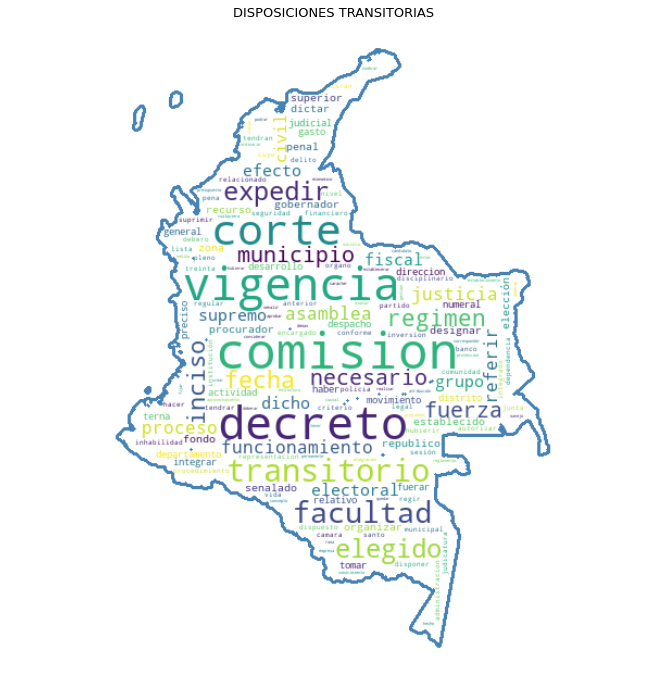

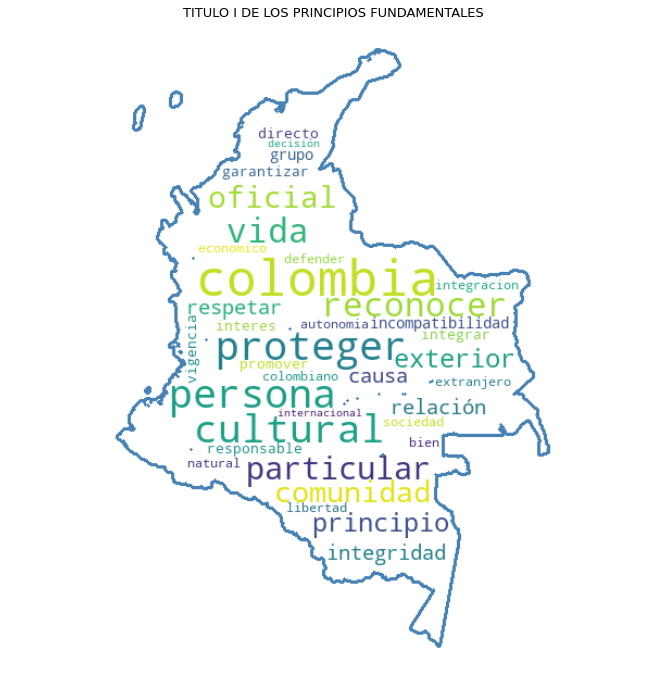

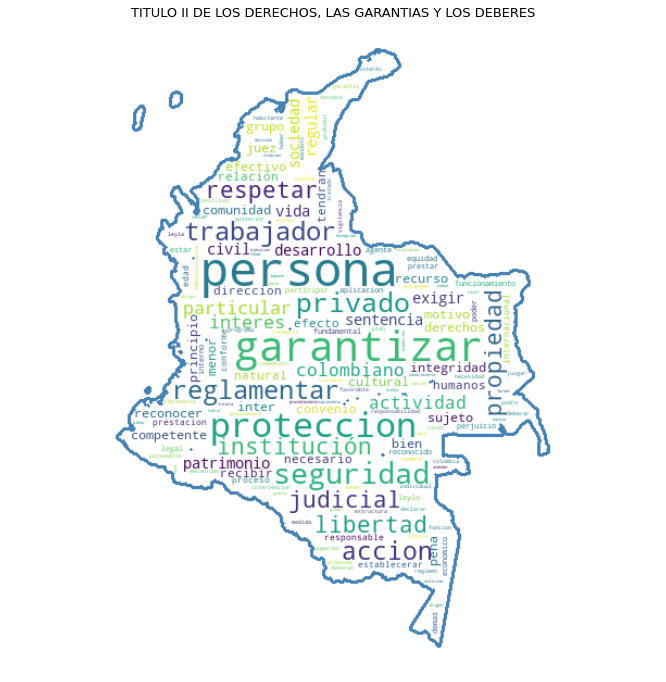

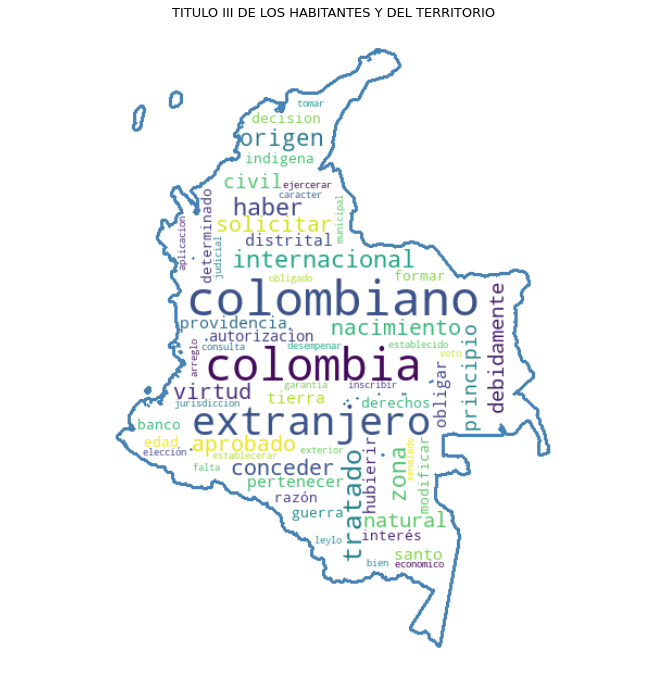

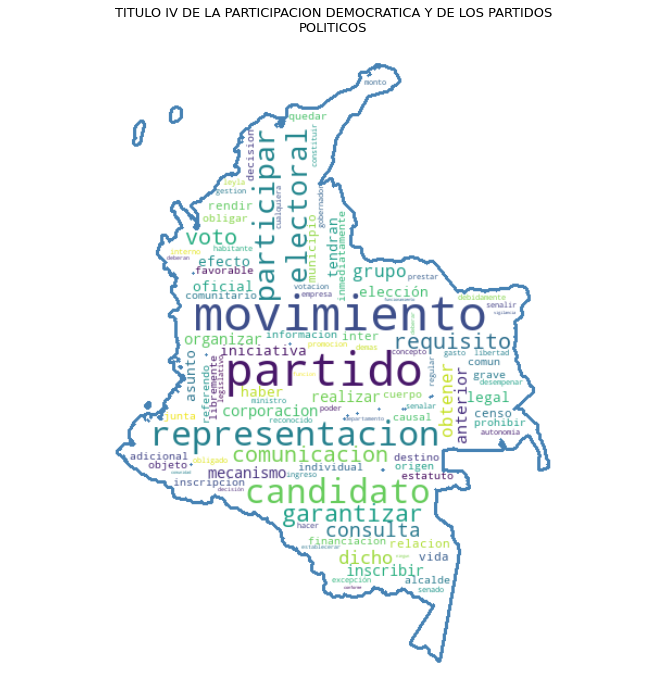

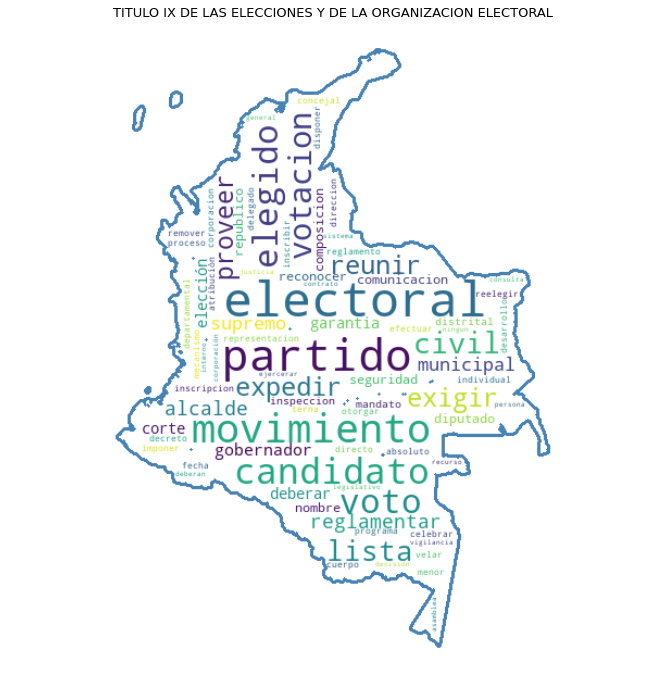

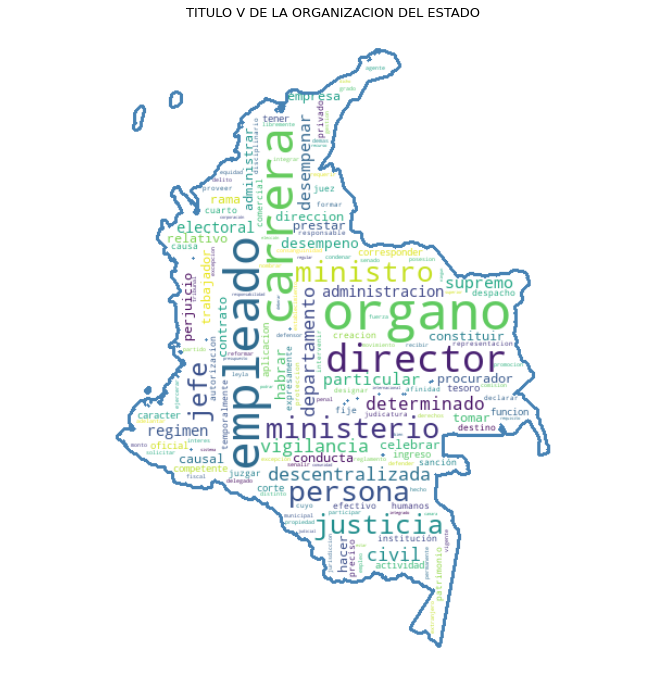

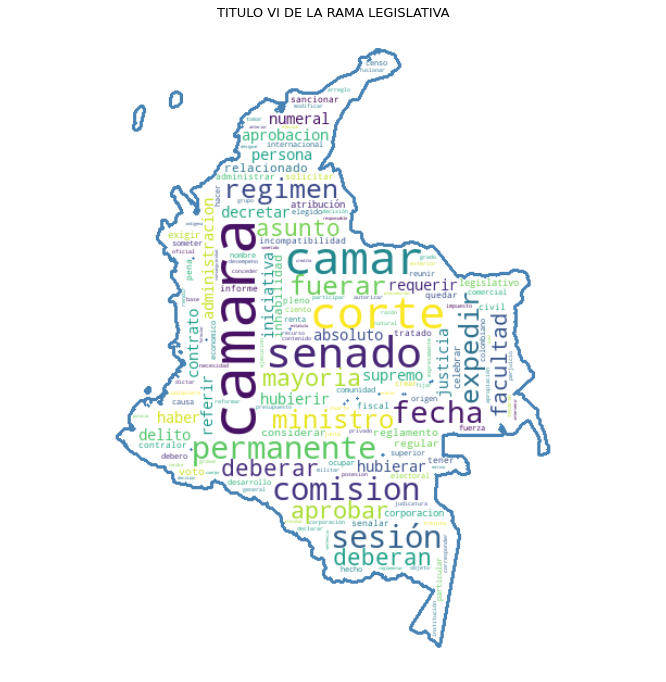

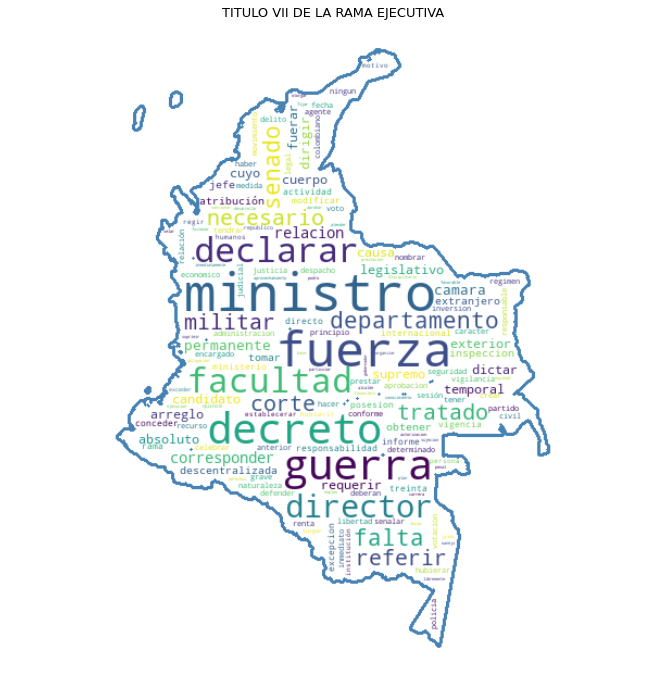

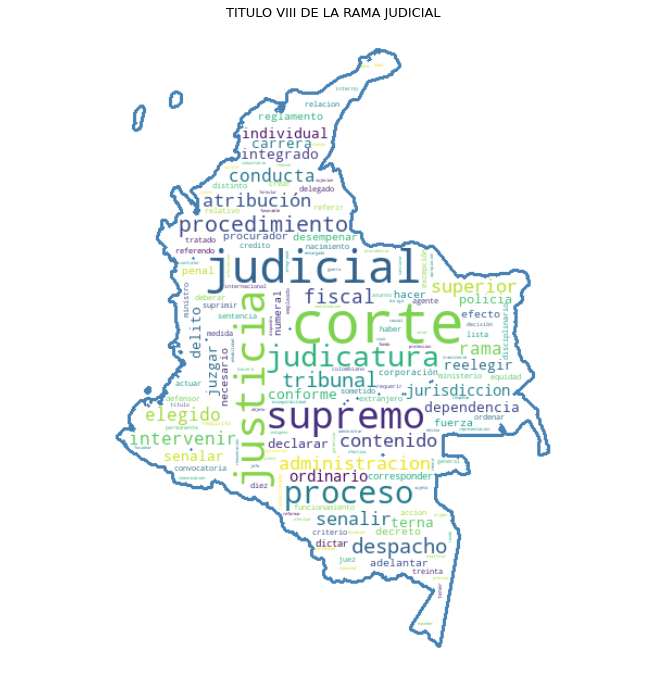

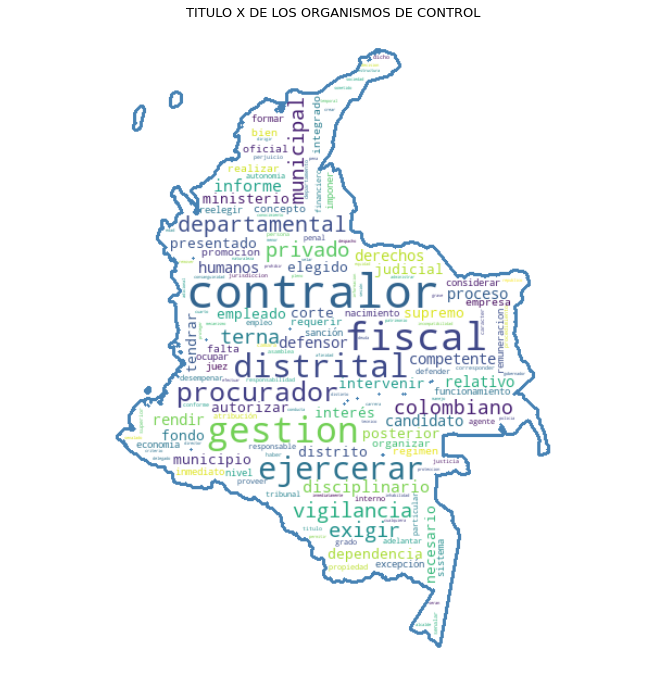

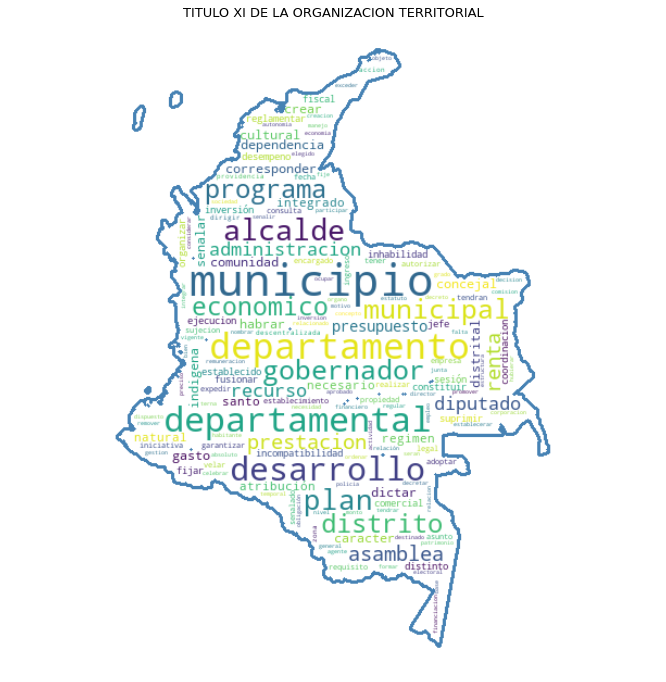

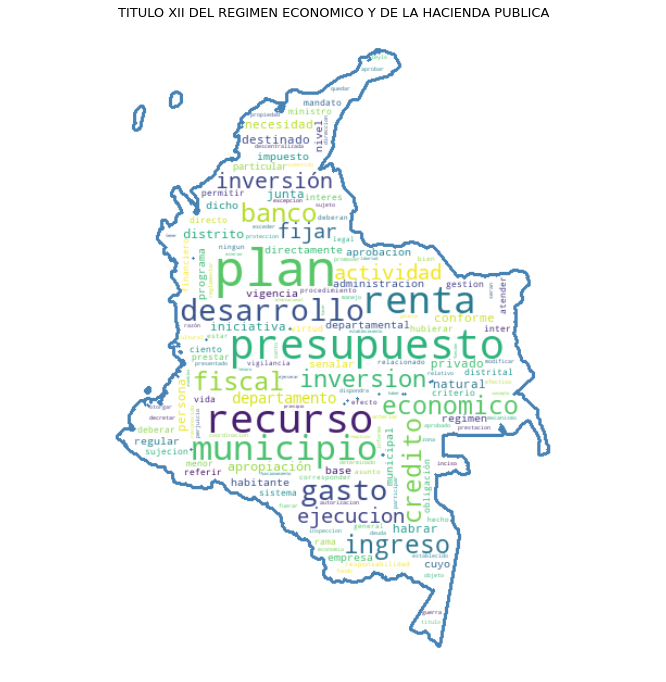

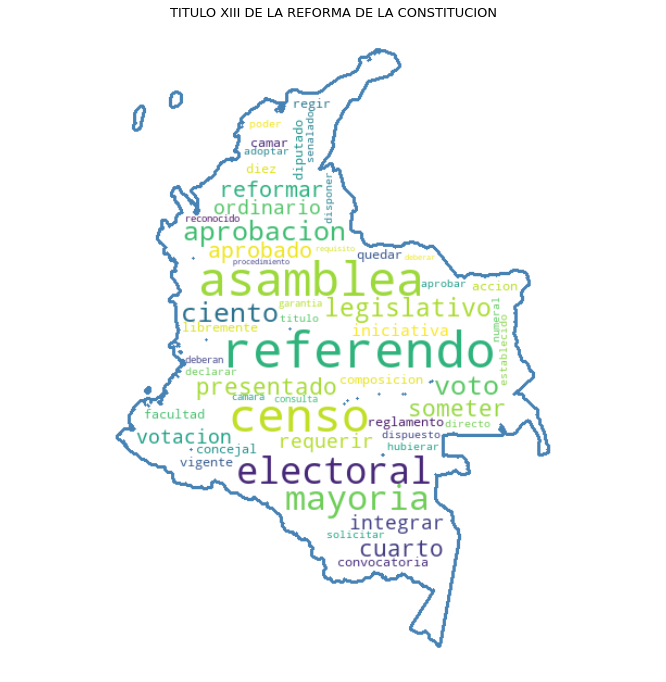

In [18]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap
from PIL import Image

mapa = np.array(Image.open('./images/map.png'))
# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=800, height=660,background_color="white", max_words=150,mask=mapa, contour_width=2, contour_color='steelblue').generate_from_frequencies(data)
  
  plt.figure(figsize=(15,12))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()


# Plotting word cloud for each title
for index,Titulo in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[Titulo].sort_values(ascending=False),Titulo)

### Ngrams

#### Unigrams

In [19]:
import plotly.graph_objects as go
import plotly.express as px

def get_top_n_words(corpus, n=None):
    # vec = CountVectorizer(stop_words=STOP_WORDS).fit(corpus)
    bag_of_words = tfidf.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_grouped['lemmatized'], 30)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 30 unigrams in the Constitution text after removing stop words and lemmatization"))
fig.show()

#### Bigrams

In [20]:
def get_top_n_bigram(corpus, n=None):
    tfidf = TfidfVectorizer(ngram_range=(2, 2),max_df=0.8 ,min_df=0.2).fit(corpus)
    bag_of_words = tfidf.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df_grouped['lemmatized'], 20)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

fig = go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 bigrams in the Constitution text after removing stop words and lemmatization"))
fig.show()

#### Trigrams

In [21]:
def get_top_n_trigram(corpus, n=None):
    tfidf = TfidfVectorizer(ngram_range=(3, 3),max_df=0.8 ,min_df=0.2).fit(corpus)
    bag_of_words = tfidf.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df_grouped['lemmatized'], 20)
df4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df4['trigram'], y=df4['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 trigrams in the Constitution text"))
fig.show()

### LDA

Nazly Santos20:30
10000
lematizacion: 4000
informacion relevante: 
TFIDF = vocabulario relevante
Nazly Santos20:31
articulo 1 
hay muchos ebrios en la escuela, que mano de ebrios, mucha ebriedad
articulo 2
Los ebrios tienen pena de carcel
articulo 3
Un ebrio se define como una persona muy borracha
D = 3
N = 30
Vocabulario =
hay, muchos, ebriols, ebrio, escuela, 
stopwords (, en, la, de, los , un)
ebrios = valor numerico
Nazly Santos20:33
frecuencia de la palabra ebrio (lematziacion) 
articulo 1
ebrio = 4
articulo
ebrio = 1
TFIDF

D= 3
TF = 12
Nazly Santos20:34
Reduccion de ruido
representacion del texto 
(embedding)
sklearn tfvectorization
Nazly Santos20:35
MxN

M = palabras importantes del vocabulario 

N= input qué tan grande quiero que sea mi vector de representacion
100, 200
50 x 100

Nazly Santos20:37
ML 
Input -> modelo ->output
modelo = topic clustering
LDA
input ? 
bag of words
hay = 1 , muchos = 2, borrachos = 3 , ebrios = 4
3,2,5,4,6,6 = articulo 1

Nazly Santos20:38   
embeddings 
hay hayan = 0.1 
TFIDF
INput =>modelo
sklearn NMF
Nazly Santos20:39
= output = listado de keywords agrupadas en clusters
Clusters = meaning
Topic es el meaning


In [22]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis
import pyLDAvis.sklearn
vectorizer = CountVectorizer(analyzer='word',       
                             max_df=0.6,           
                             min_df=0.4,         
                            # stop_words=spacy_stopwords,           
                             lowercase=True,                   
                             token_pattern='[a-zA-Z0-9]{3,}',  
                             max_features=5000,          
                            )

data_vectorized = vectorizer.fit_transform(df_grouped['lemmatized'])

lda_model = LatentDirichletAllocation(n_components=10, # Number of topics
                                      learning_decay= 0.5,
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
6      32.420952   8.115230       1        1  38.307529
5       0.648955  71.707100       2        1  32.677842
9      71.019684   9.971006       3        1  16.129817
2       3.785981  33.185135       4        1  12.668976
3     -42.666500  -9.222070       5        1   0.035973
4      -3.621689 -43.526516       6        1   0.035973
0      -3.632402  -4.171708       7        1   0.035973
8     -36.584400  35.804413       8        1   0.035973
1      44.391380  50.615383       9        1   0.035973
7      40.235809 -31.591665      10        1   0.035973, topic_info=           Term       Freq      Total Category  logprob  loglift
57   desarrollo  54.000000  54.000000  Default  30.0000  30.0000
39        corte  78.000000  78.000000  Default  29.0000  29.0000
165        plan  46.000000  46.000000  Default  28.0000  28.0000
19       camara  52.000000  52.000000  Default  27.0000  27.0000
72    economico  42.000000  42.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
165        plan   0.007359  46.609516  Topic10  -5.2393  -0.8235
156   organizar   0.006972  20.807865  Topic10  -5.2934  -0.0711
95       fiscal   0.007242  47.536271  Topic10  -5.2553  -0.8591
15     atribuci   0.006899  25.580225  Topic10  -5.3039  -0.2881
61       dictar   0.006894  26.546249  Topic10  -5.3045  -0.3258

[590 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         1  0.231628   absoluto
0         2  0.636978   absoluto
0         4  0.057907   absoluto
1         1  0.651368  actividad
1         2  0.266469  actividad
...     ...       ...        ...
219       3  0.324290     virtud
220       1  0.075982   votacion
220       2  0.531877   votacion
220       3  0.075982   votacion
220       4  0.303929   votacion

[686 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 10, 3, 4, 5, 1, 9, 2, 8])

In [23]:
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20)

df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Word 0         Word 1      Word 2       Word 3     Word 4  \
Topic 0          corte       justicia    ministro      supremo   declarar   
Topic 1         camara     permanente       corte       senado   comision   
Topic 2     movimiento        partido   candidato    electoral  contralor   
Topic 3     garantizar     movimiento       corte       fuerza    partido   
Topic 4     desarrollo  departamental        plan  presupuesto      corte   
Topic 5         camara       ministro       corte       senado     fuerza   
Topic 6     desarrollo           plan  garantizar  presupuesto  economico   
Topic 7  departamental     prestacion  desarrollo   gobernador    alcalde   
Topic 8           plan     desarrollo      fiscal  presupuesto      gasto   
Topic 9          corte       justicia     supremo      decreto   comision   

                Word 5     Word 6       Word 7      Word 8         Word 9  \
Topic 0   corresponder      hacer     director      fiscal      necesario   
Topic 1    presupuesto     asunto   desarrollo      delito        aprobar   
Topic 2         fiscal    gestion    municipal   ejercerar  departamental   
Topic 3        decreto  necesario     ministro   candidato         guerra   
Topic 4      municipal  economico       camara  gobernador         fiscal   
Topic 5     permanente   declarar      mayoria     supremo       comision   
Topic 6  departamental      gasto   proteccion   actividad      municipal   
Topic 7      economico  municipal  presupuesto    indigena   corresponder   
Topic 8      inversion    credito        fijar     ingreso      economico   
Topic 9     colombiano   vigencia      proceso  extranjero         fiscal   

            Word 10       Word 11       Word 12     Word 13       Word 14  \
Topic 0      fuerza    particular       decreto  intervenir        delito   
Topic 1   economico        fiscal      atribuci     supremo         banco   
Topic 2  procurador       supremo         corte  colombiano    competente   
Topic 3    vigencia      director      declarar   electoral  corresponder   
Topic 4    comision       alcalde  corresponder   necesario    proteccion   
Topic 5     referir  corresponder     electoral    justicia      requerir   
Topic 6    cultural   reglamentar        fiscal     ingreso       natural   
Topic 7       gasto          plan      distinto    comision      cultural   
Topic 8       banco     actividad       empresa     natural    iniciativa   
Topic 9  judicatura        fuerza     necesario      efecto    procurador   

            Word 15     Word 16      Word 17        Word 18      Word 19  
Topic 0    empleado   excepcion   judicatura       tribunal         rama  
Topic 1    justicia    ministro   iniciativa     cualquiera    actividad  
Topic 2    relativo     oficial   participar  disciplinario     realizar  
Topic 3     tratado      senado       dictar     colombiano     justicia  
Topic 4  garantizar     decreto     vigencia         dictar      general  
Topic 5    director     decreto  legislativo        tratado       guerra  
Topic 6  prestacion  gobernador        fijar        alcalde    inversion  
Topic 7       crear      fiscal      empresa    establecido  relacionado  
Topic 8   habitante       junta        nivel           cuyo        hecho  
Topic 9       penal    tribunal      referir        senalir       dictar

In [24]:
Topics_theme = ['Tema1', 'Tema2','Tema3', 'Tema4', 'Tema5','Tema6','Tema7','Tema8','Tema9','Tema10']
df_topic_keywords['topic_theme'] = Topics_theme
df_topic_keywords.set_index('topic_theme', inplace=True)
df_topic_keywords.T

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



topic_theme         Tema1        Tema2          Tema3         Tema4  \
Word 0              corte       camara     movimiento    garantizar   
Word 1           justicia   permanente        partido    movimiento   
Word 2           ministro        corte      candidato         corte   
Word 3            supremo       senado      electoral        fuerza   
Word 4           declarar     comision      contralor       partido   
Word 5       corresponder  presupuesto         fiscal       decreto   
Word 6              hacer       asunto        gestion     necesario   
Word 7           director   desarrollo      municipal      ministro   
Word 8             fiscal       delito      ejercerar     candidato   
Word 9          necesario      aprobar  departamental        guerra   
Word 10            fuerza    economico     procurador      vigencia   
Word 11        particular       fiscal        supremo      director   
Word 12           decreto     atribuci          corte      declarar   
Word 13        intervenir      supremo     colombiano     electoral   
Word 14            delito        banco     competente  corresponder   
Word 15          empleado     justicia       relativo       tratado   
Word 16         excepcion     ministro        oficial        senado   
Word 17        judicatura   iniciativa     participar        dictar   
Word 18          tribunal   cualquiera  disciplinario    colombiano   
Word 19              rama    actividad       realizar      justicia   

topic_theme          Tema5         Tema6          Tema7          Tema8  \
Word 0          desarrollo        camara     desarrollo  departamental   
Word 1       departamental      ministro           plan     prestacion   
Word 2                plan         corte     garantizar     desarrollo   
Word 3         presupuesto        senado    presupuesto     gobernador   
Word 4               corte        fuerza      economico        alcalde   
Word 5           municipal    permanente  departamental      economico   
Word 6           economico      declarar          gasto      municipal   
Word 7              camara       mayoria     proteccion    presupuesto   
Word 8          gobernador       supremo      actividad       indigena   
Word 9              fiscal      comision      municipal   corresponder   
Word 10           comision       referir       cultural          gasto   
Word 11            alcalde  corresponder    reglamentar           plan   
Word 12       corresponder     electoral         fiscal       distinto   
Word 13          necesario      justicia        ingreso       comision   
Word 14         proteccion      requerir        natural       cultural   
Word 15         garantizar      director     prestacion          crear   
Word 16            decreto       decreto     gobernador         fiscal   
Word 17           vigencia   legislativo          fijar        empresa   
Word 18             dictar       tratado        alcalde    establecido   
Word 19            general        guerra      inversion    relacionado   

topic_theme        Tema9      Tema10  
Word 0              plan       corte  
Word 1        desarrollo    justicia  
Word 2            fiscal     supremo  
Word 3       presupuesto     decreto  
Word 4             gasto    comision  
Word 5         inversion  colombiano  
Word 6           credito    vigencia  
Word 7             fijar     proceso  
Word 8           ingreso  extranjero  
Word 9         economico      fiscal  
Word 10            banco  judicatura  
Word 11        actividad      fuerza  
Word 12          empresa   necesario  
Word 13          natural      efecto  
Word 14       iniciativa  procurador  
Word 15        habitante       penal  
Word 16            junta    tribunal  
Word 17            nivel     referir  
Word 18             cuyo     senalir  
Word 19            hecho      dictar

## Tree plot

In [25]:
from treelib import Node, Tree
tree = Tree() #Tree initialization
# df.reset_index(inplace=True)


/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [26]:
# Index creation for coming organization

for index, row in df.iterrows():
    if row['NombreCapitulo'] == None:
        df['NombreCapitulo'][index] = f"{df['Titulos'][index],df['Capitulos'][index]}"


df=df.assign(idT = (df['Titulos']).astype('category').cat.codes)
df=df.assign(idC = (df['Titulos'] + '_' +df['NombreCapitulo']).astype('category').cat.codes)
df['idA'] = range(len(df))

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [27]:
df.head()

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Titulos   Capitulos                Articulos  \
0  DISPOSICIONES TRANSITORIAS  CAPITULO 1   Artículo transitorio 1   
1  DISPOSICIONES TRANSITORIAS  CAPITULO 1  Artículo transitorio 10   
2  DISPOSICIONES TRANSITORIAS  CAPITULO 1  Artículo transitorio 11   
3  DISPOSICIONES TRANSITORIAS  CAPITULO 1  Artículo transitorio 12   
4  DISPOSICIONES TRANSITORIAS  CAPITULO 1  Artículo transitorio 13   

  NombreTitulo                                NombreCapitulo  \
0         None  ('DISPOSICIONES TRANSITORIAS', 'CAPITULO 1')   
1         None  ('DISPOSICIONES TRANSITORIAS', 'CAPITULO 1')   
2         None  ('DISPOSICIONES TRANSITORIAS', 'CAPITULO 1')   
3         None  ('DISPOSICIONES TRANSITORIAS', 'CAPITULO 1')   
4         None  ('DISPOSICIONES TRANSITORIAS', 'CAPITULO 1')   

                                           Contenido  \
0  convocase a elecciones generales del congreso ...   
1  los decretos que expida el gobierno en ejercic...   
2  las facultades extraordinarias a que se refier...   
3  con el fin de facilitar la reincorporacion a l...   
4  dentro de los tres anos siguientes a la entrad...   

                                          lemmatized  idT  idC  idA  
0  convocar elección general congreso republica o...    0    0    0  
1  decreto expidar gobierno ejercicio facultad ot...    0    0    1  
2  facultad extraordinario referir articulo trans...    0    0    2  
3  facilitar reincorporacion vida civil grupo gue...    0    0    3  
4   siguiente entrada vigencia constitucion gobie...    0    0    4

In [28]:
# Tree root.
tree.create_node("Constitucion","Cons") #root

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Node(tag=Constitucion, identifier=Cons, data=None)

In [29]:
#Node and Child creation
for index, row in df.iterrows():
    if not tree.contains((f"Tit{row['idT']}")):
        tree.create_node(row['Titulos'],(f"Tit{row['idT']}"), parent='Cons')
    if not tree.contains((f"Cap{row['idC']}")):
        tree.create_node(row['Capitulos'],(f"Cap{row['idC']}"),parent=(f"Tit{row['idT']}"))
    if not tree.contains((f"Art{row['idA']}")):
        tree.create_node(row['Articulos'],(f"Art{row['idA']}"),parent=(f"Cap{row['idC']}"))

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [30]:
tree.show()

Constitucion
├── DISPOSICIONES TRANSITORIAS
│   ├── CAPITULO 1
│   │   ├── Artículo transitorio 1
│   │   ├── Artículo transitorio 10
│   │   ├── Artículo transitorio 11
│   │   ├── Artículo transitorio 12
│   │   ├── Artículo transitorio 13
│   │   ├── Artículo transitorio 14
│   │   ├── Artículo transitorio 15
│   │   ├── Artículo transitorio 16
│   │   ├── Artículo transitorio 17
│   │   ├── Artículo transitorio 18
│   │   ├── Artículo transitorio 2
│   │   ├── Artículo transitorio 3
│   │   ├── Artículo transitorio 4
│   │   ├── Artículo transitorio 5
│   │   ├── Artículo transitorio 6
│   │   ├── Artículo transitorio 7
│   │   ├── Artículo transitorio 8
│   │   └── Artículo transitorio 9
│   ├── CAPITULO 2
│   │   ├── Artículo transitorio 20
│   │   └── Artículo transitorio 21
│   ├── CAPITULO 3
│   │   ├── Artículo transitorio 22
│   │   ├── Artículo transitorio 23
│   │   ├── Artículo transitorio 24
│   │   ├── Artículo transitorio 25
│   │   ├── Artículo transitorio 26
│   │   

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Tree visualization (pending)

In [31]:
# dot = tree.to_graphviz(filename='Constitucion.gv')

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [32]:

# from graphviz import Source
# dot = Source.from_file('Constitucion.gv')

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [33]:
# dot.render('Constitucion.gv', view=True)  

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [34]:
# Funcion que cuente h1, h2 y articulos

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [35]:
### 2) Number of paragraphs

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [36]:
### 3) Number of words

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [37]:
### 4) Lematizacion y que pasa despues

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [38]:
### 5) Most frequent relevant words

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [39]:
## TFIDF / NMF / LDA

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

